In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.transforms import offset_copy
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
class Location:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon


In [4]:
oli = Location('OLI', 70.49525, -149.88688)
ascos = Location('ASCOS', 87.19, -9.67)
smt = Location("SMT", 72.6, -38.5)

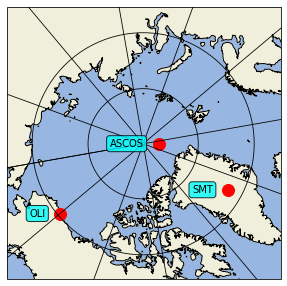

In [7]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=ccrs.NorthPolarStereo(central_longitude=-100))
ax.plot(oli.lon, oli.lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())
ax.plot(ascos.lon, ascos.lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())
ax.plot(smt.lon, smt.lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())

cartopy_transform = ccrs.PlateCarree()._as_mpl_transform(ax)
text_transform = offset_copy(cartopy_transform, units='dots', x=-15)

text_kwargs = dict(verticalalignment='center', horizontalalignment='right', transform=text_transform,
        bbox={
            'facecolor':'aqua',
            'alpha' : 0.8,
            'boxstyle' : 'round'
        })

ax.text(oli.lon, oli.lat, "OLI", **text_kwargs)
ax.text(ascos.lon, ascos.lat, "ASCOS", **text_kwargs)
ax.text(smt.lon, smt.lat, "SMT", **text_kwargs)

ax.set_extent([0, 360, 65, 90], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)

xticks = np.arange(-180, 181, 30)
yticks = np.arange(70, 91, 10)

ax.gridlines(xlocs=xticks, ylocs=yticks, transform=ccrs.PlateCarree(), color='k')

# plt.savefig('map.png', facecolor='w')